In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
results = pd.read_json('results.json', orient='records')
results.sixHz_accuracy = results.sixHz_accuracy.apply(np.mean)
results.sevenHz_accuracy = results.sevenHz_accuracy.apply(np.mean)
results.null_accuracy = results.null_accuracy.apply(np.mean)
results = results.round(2)
results

,windowTime,percentile,freqInterval,sixHz_accuracy,sevenHz_accuracy,null_accuracy
0,1,75,0.1,0.56,0.00,1.00
1,1,75,0.2,0.56,0.00,1.00
2,1,75,0.3,0.57,0.01,1.00
3,1,75,0.4,0.57,0.01,1.00
4,1,75,0.5,0.57,0.57,0.72
...,...,...,...,...,...,...
148,5,99,0.1,0.66,0.85,0.97
149,5,99,0.2,0.66,0.85,0.97
150,5,99,0.3,0.69,0.85,0.97
151,5,99,0.4,0.69,0.85,0.97


In [12]:
results = results.melt(id_vars=['windowTime','percentile', 'freqInterval'], var_name = 'frequency', value_name='accuracy')
results

,windowTime,percentile,freqInterval,frequency,accuracy
0,1,75,0.1,sixHz_accuracy,0.56
1,1,75,0.2,sixHz_accuracy,0.56
2,1,75,0.3,sixHz_accuracy,0.57
3,1,75,0.4,sixHz_accuracy,0.57
4,1,75,0.5,sixHz_accuracy,0.57
...,...,...,...,...,...
454,5,99,0.1,null_accuracy,0.97
455,5,99,0.2,null_accuracy,0.97
456,5,99,0.3,null_accuracy,0.97
457,5,99,0.4,null_accuracy,0.97


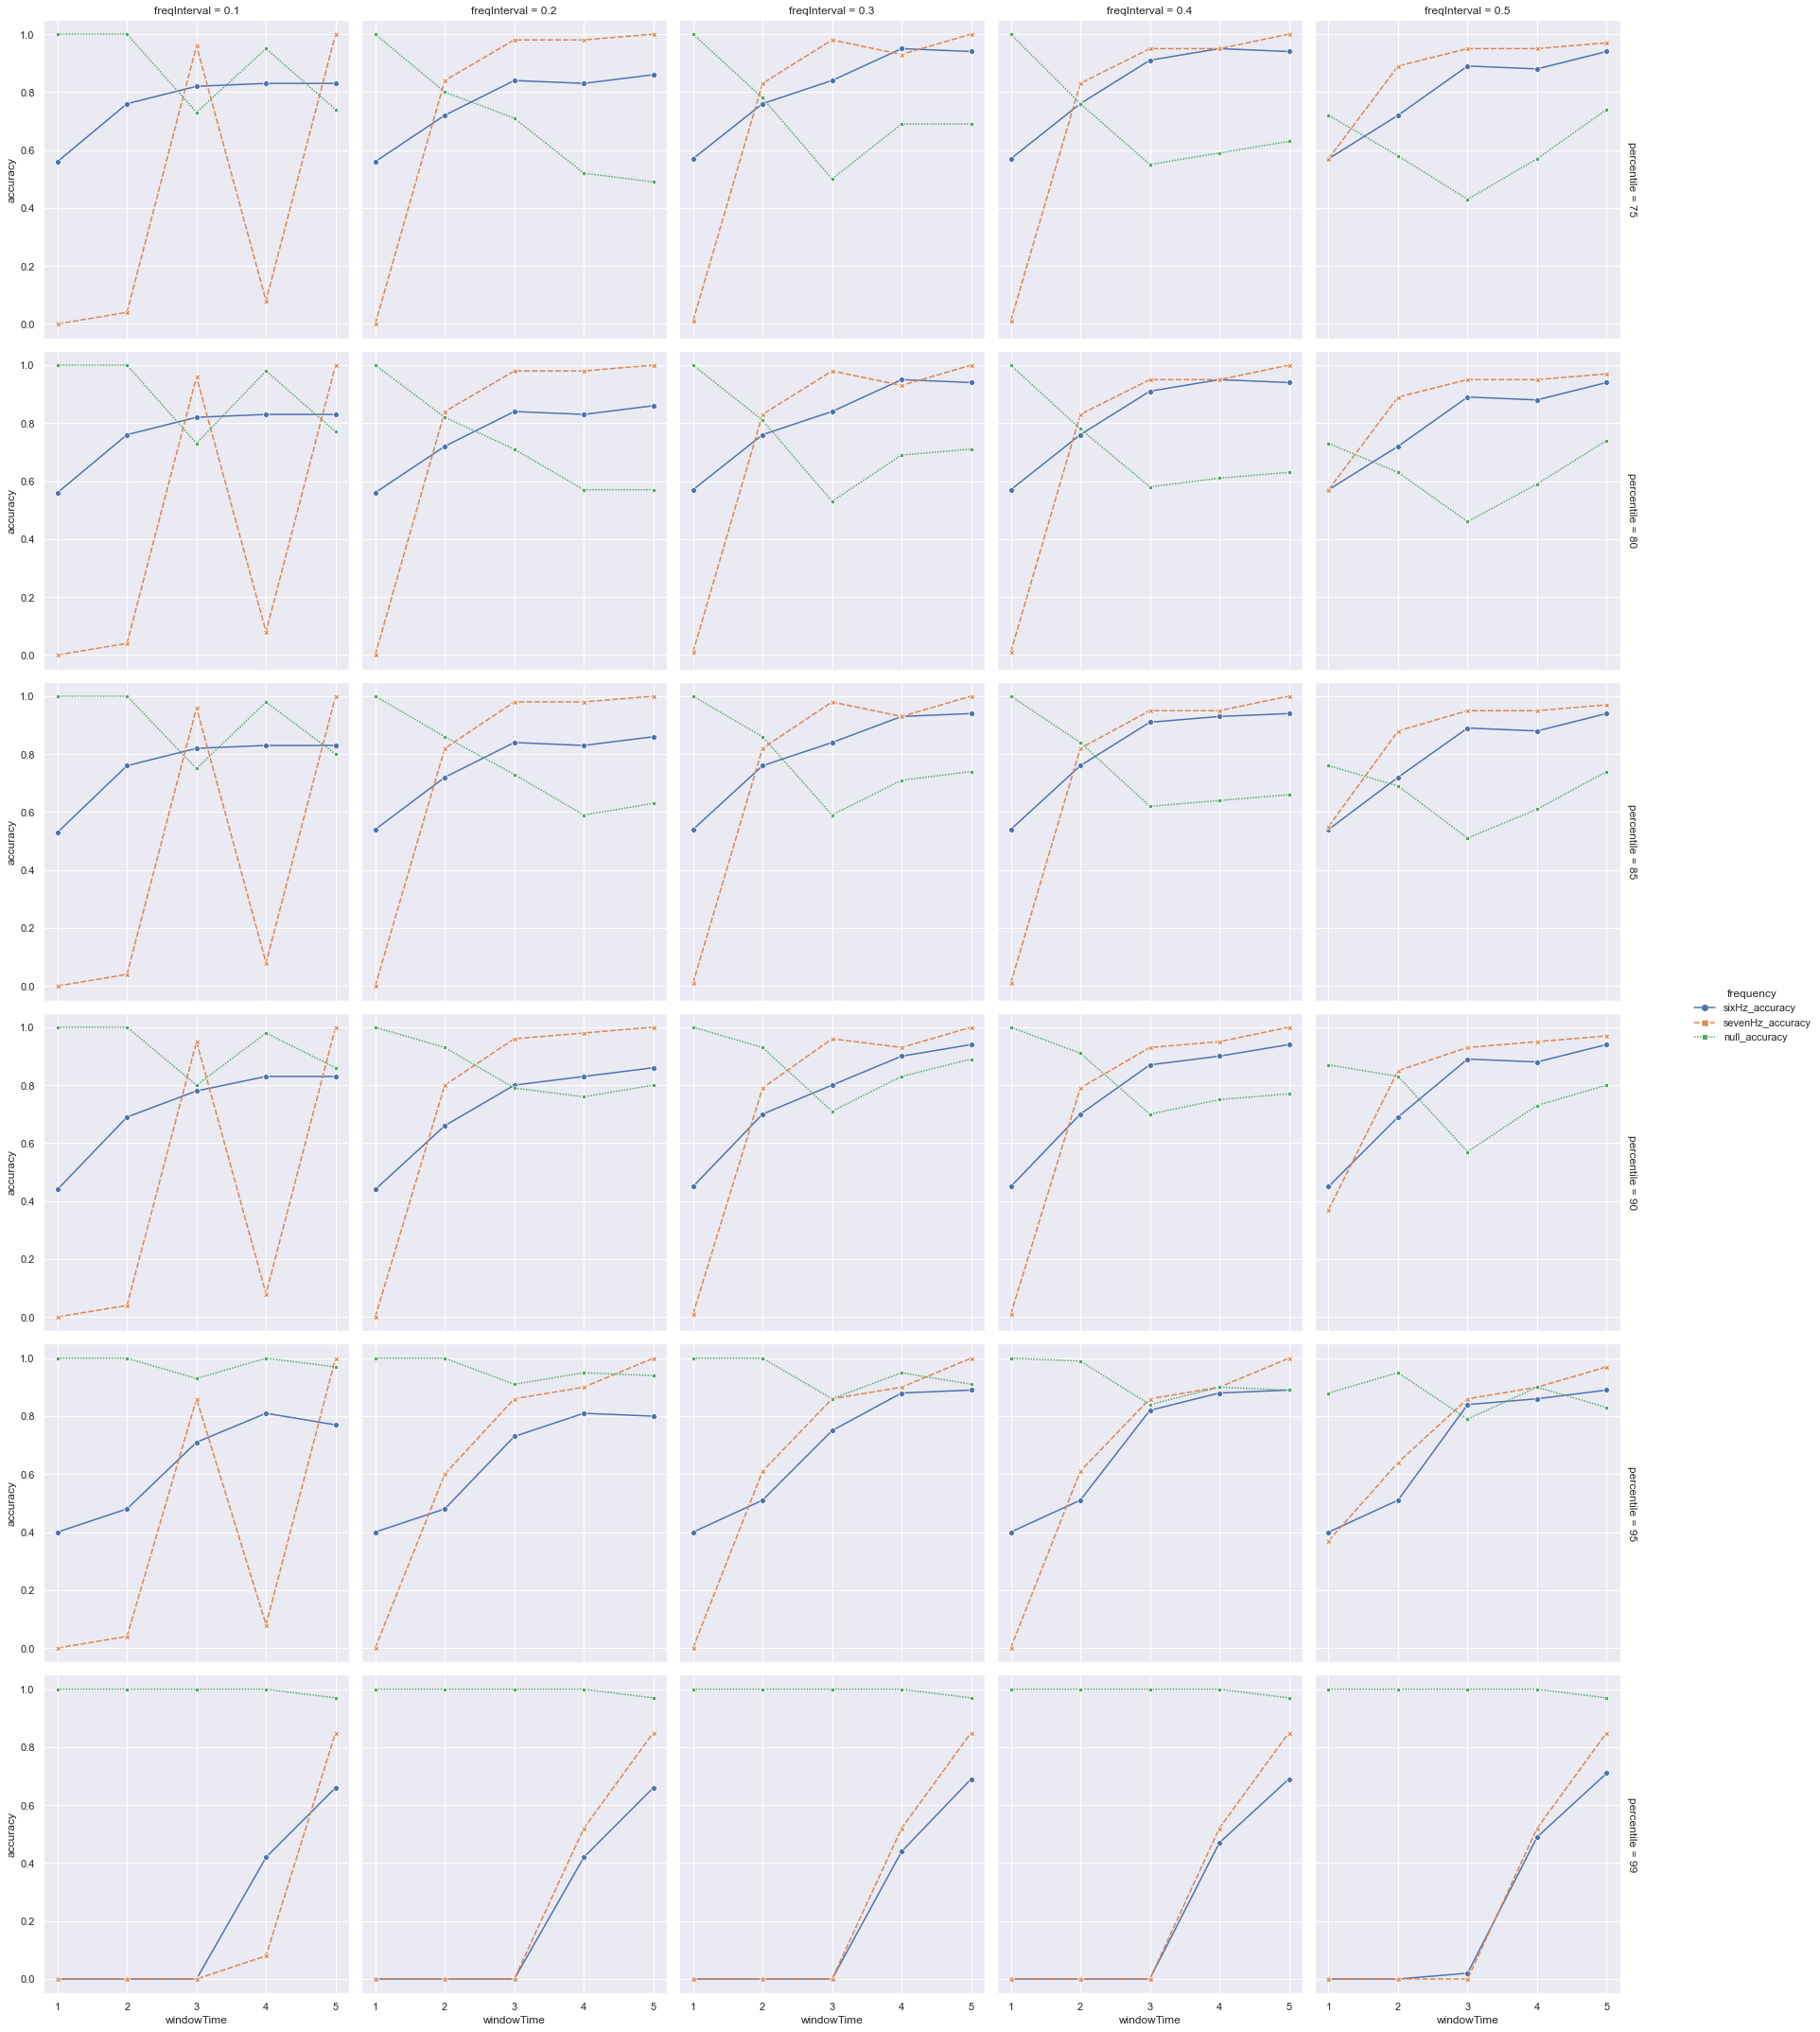

In [13]:
sns.set_theme(style="darkgrid")
sns.relplot(
    data=results, x="windowTime", y="accuracy", col="freqInterval", row="percentile", hue="frequency", style='frequency', kind='line',
    facet_kws={'margin_titles':True, 'subplot_kws': {'xticks': [1,2,3,4,5]}, 'despine':False}, markers=True
)
plt.show()